In [1]:
import torch
from torchvision import models
import torchvision.transforms as tt
import numpy as np

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal

In [9]:
# !pip install pillow

In [10]:
# !pip install torchvision

In [81]:

fcn = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

def resizeImg(img,dimension=256):
    t=tt.Compose([tt.Resize(dimension)])
    img=t(img)
    return img

def generateMask(img,net=fcn):
    trf = tt.Compose([tt.ToTensor(), 
                   tt.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    return rgb

##  Load a picture

(1920, 1440, 3)

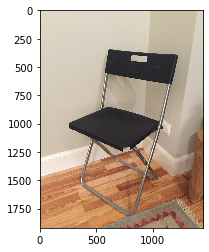

In [74]:
path_user_image='../ikea_scraper/img_users/realtest2.jpeg'

img = Image.open(path_user_image)
plt.imshow(img)
imarr = np.array(img)
imarr.shape

## Resize image:

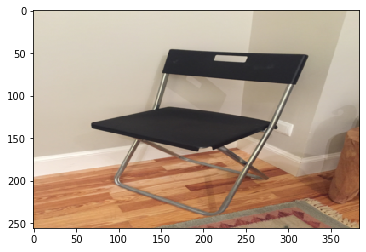

In [75]:
img = resizeImg(img,(256,384))
img_size = img.size
img_size
plt.imshow(img)

In [76]:

# Generate a mask

mask = generateMask(img)
background_mask = np.all(mask == [0, 0, 0], axis=-1)
foreground_mask = np.any(mask != [0, 0, 0], axis=-1)
foreground_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

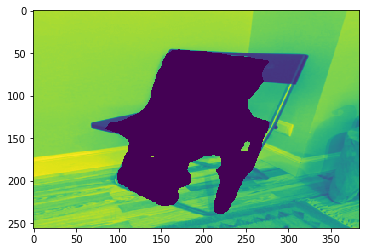

In [77]:

# Your code here
img2 = img.copy()
imgarr = np.array(img2)
background = imgarr[:, :, 0] * background_mask
foreground = imgarr[:, :, 0] * foreground_mask

#Get the background and transform the shape to black
#Get the foreground and transform the back to black
plt.imshow(background)

In [78]:

# Your code here
back_bnw = Image.fromarray(background).convert("L")
fore_bnw = Image.fromarray(foreground).convert("L")

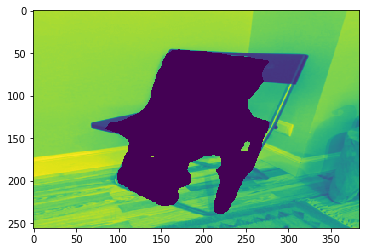

In [79]:
plt.imshow(back_bnw)

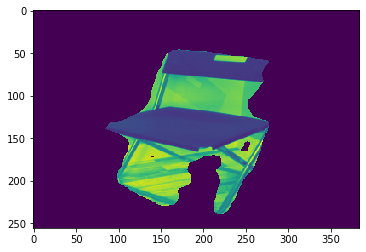

In [80]:
plt.imshow(fore_bnw)
